# Trigonometric Regression with Neural Networks

Exploring the application of a neural network-based regression model in predicting target values generated from a trigonometric function of randomly generated 2D coordinates. The model architecture consists of:-

 **Multiple dense layers**, trained using the **Adam optimizer**, and evaluated using **mean squared error**.

 Visualizations include a 3D scatter **plot of the data points**, **training loss** over epochs, a **3D surface plot** illustrating the prediction surface, and a **scatter plot** comparing actual vs predicted values.

In [ ]:
# Importing necessary libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
# Generate random 2D coordinates between -3 and 3.
N = 1000
X = np.random.random((N, 2)) * 6 - 3

# Calculate target values based on a trigonometric function of the features.
Y = np.arcsinh(X[:, 0]) + np.arcsinh(2 * X[:, 1])

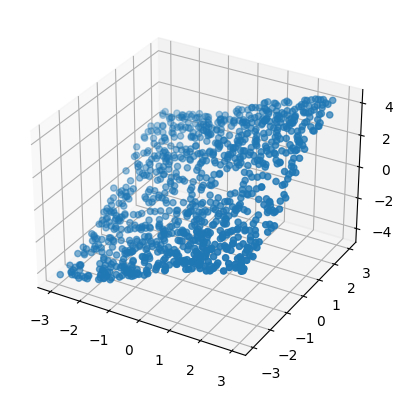

In [ ]:
# Creating a 3D scatter plot of the data points.
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], Y)

In [ ]:
# Building Neural Network Model

model = tf.keras.models.Sequential([ # a 4 layered sequential model
    tf.keras.layers.Dense(128, input_shape=(2,), activation = 'relu'), # 128 neurons with ReLU activation (input layer)
    tf.keras.layers.Dense(64, activation = 'relu'), # 64 neurons with ReLU activation
    tf.keras.layers.Dense(32, activation = 'relu'), # 32 neurons with ReLU activation
    tf.keras.layers.Dense(1) # 1 neuron (output layer)
])

In [ ]:
# Optimising with a learning rate of 0.001

opt = tf.keras.optimizers.Adam(0.001)
model.compile(
    optimizer = opt,
    loss = 'mse', # mean squared error loss
)

r = model.fit(X,Y,epochs=300) # Trains the model for 300 epochs

Epoch 1/300
32/32 [==============================] - 2s 4ms/step - loss: 1.6950
Epoch 2/300
32/32 [==============================] - 0s 4ms/step - loss: 0.1113
Epoch 3/300
32/32 [==============================] - 0s 3ms/step - loss: 0.0495
Epoch 4/300
32/32 [==============================] - 0s 2ms/step - loss: 0.0368
Epoch 5/300
32/32 [==============================] - 0s 2ms/step - loss: 0.0328
Epoch 6/300
32/32 [==============================] - 0s 2ms/step - loss: 0.0282
Epoch 7/300
32/32 [==============================] - 0s 2ms/step - loss: 0.0232
Epoch 8/300
32/32 [==============================] - 0s 2ms/step - loss: 0.0177
Epoch 9/300
32/32 [==============================] - 0s 2ms/step - loss: 0.0154
Epoch 10/300
32/32 [==============================] - 0s 2ms/step - loss: 0.0126
Epoch 11/300
32/32 [==============================] - 0s 2ms/step - loss: 0.0107
Epoch 12/300
32/32 [==============================] - 0s 2ms/step - loss: 0.0086
Epoch 13/300
32/32 [=================

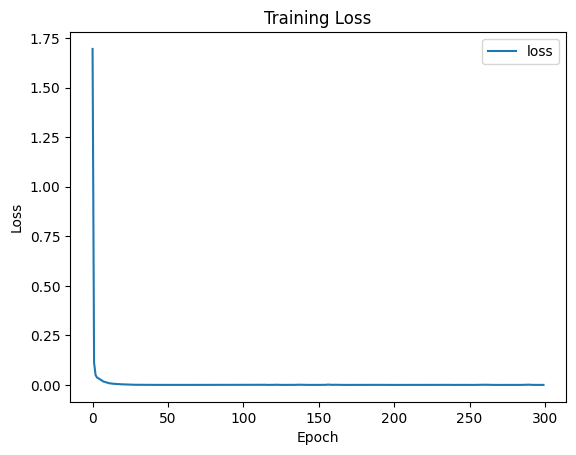

In [ ]:
# Plotting the training loss over epochs to visualize the learning process.
plt.figure()
plt.plot(r.history['loss'], label='loss')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

79/79 [==============================] - 0s 4ms/step


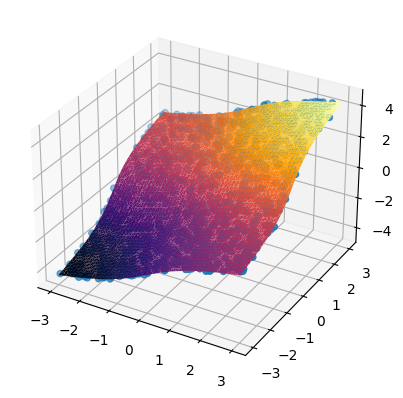

In [ ]:
# Plotting the prediction surface.
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], Y)

# Surface plot.
line = np.linspace(-3, 3, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:, 0], Xgrid[:, 1], Yhat, linewidth=0.2, antialiased=True, cmap="inferno")
plt.show()

32/32 [==============================] - 0s 2ms/step


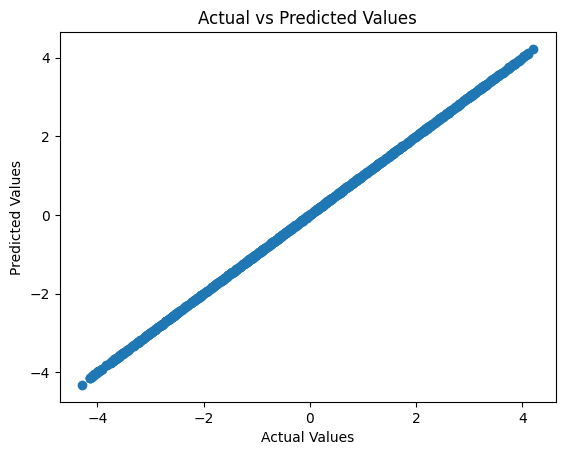

In [ ]:
# Plotting the actual values (Y) against the predicted values (model.predict(X)) to assess model accuracy.
plt.figure()
plt.scatter(Y, model.predict(X))
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()